# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [103]:

%load_ext autoreload


import numpy as np
import matplotlib.pyplot as plt

from ISLM_anna import ISLMclass
from scipy.optimize import fsolve

# Adjusted parameters
model = ISLMclass(
    a=100, b=0.75, c=150, d=0.05, e=0.6, f=2.5, g=2,
    T=200, G=320, M=1080, P=1.5, r=0.03, N=500
)

# Function to solve the IS and LM equations
def equations(vars):
    Y, r = vars
    model.par.r = r  # Update the interest rate in the model
    eq1 = model.IS_curve(Y) - Y  # IS curve equation
    eq2 = model.LM_curve(Y) - r  # LM curve equation
    return [eq1, eq2]

# Initial guesses for Y and r
initial_guesses = [500, 0.04]

# Solve for Y and r
solution = fsolve(equations, initial_guesses)
print(f'Equilibrium Output (Y): {solution[0]}')
print(f'Equilibrium Interest Rate (r): {solution[1]}')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Equilibrium Output (Y): 1200.0
Equilibrium Interest Rate (r): 2.092878658846524e-11


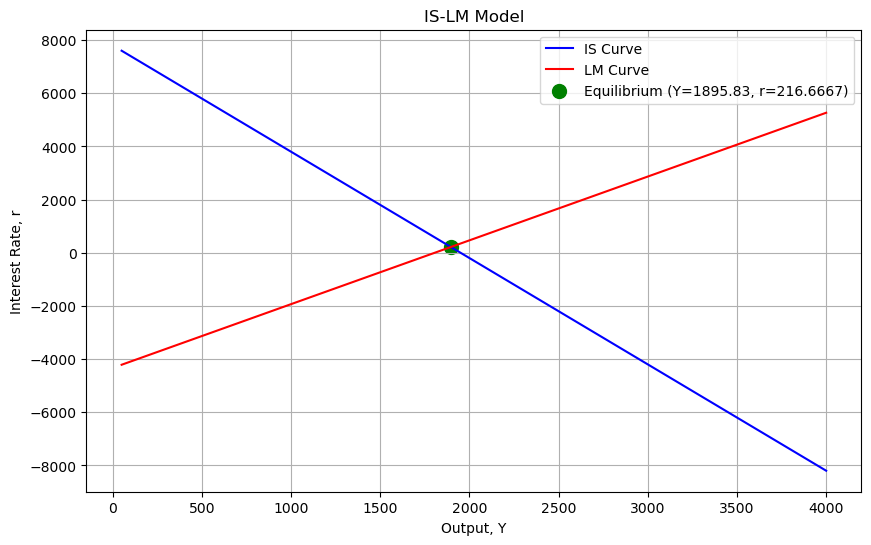

In [104]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from ISLM_anna import ISLMclass

# Initialize the model with adjusted parameters for better curve fitting
model = ISLMclass(
    a=100, b=0.8, c=150, d=0.05, e=1.2, f=0.5, g=2,
    T=200, G=300, M=6500, P=3, r=0.04, N=500
)

# Define functions to compute IS and LM interest rates
def IS_r(Y):
    # Adjusting to return r directly
    return (1 / model.par.d) * (model.par.a + model.par.c - model.par.b * model.par.T + model.par.G - (1 - model.par.b) * Y)

def LM_r(Y):
    # Adjusting to return r directly
    return (model.par.e / model.par.f) * Y - (1 / model.par.f) * (model.par.M / model.par.P)

# Generate Y values and compute r for IS and LM curves
Y_values = np.linspace(50, 4000, 400)  # Adjusted range if needed
IS_r_values = [IS_r(Y) for Y in Y_values]
LM_r_values = [LM_r(Y) for Y in Y_values]

# Find equilibrium by minimizing the difference between the IS and LM r values
Y_eq_guess = 500
Y_eq = fsolve(lambda Y: abs(IS_r(Y) - LM_r(Y)), Y_eq_guess)
r_eq_IS = IS_r(Y_eq[0])
r_eq_LM = LM_r(Y_eq[0])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(Y_values, IS_r_values, label='IS Curve', color='blue')
plt.plot(Y_values, LM_r_values, label='LM Curve', color='red')
plt.scatter(Y_eq, r_eq_IS, color='green', s=100, label=f'Equilibrium (Y={Y_eq[0]:.2f}, r={r_eq_IS:.4f})')
plt.title('IS-LM Model')
plt.xlabel('Output, Y')
plt.ylabel('Interest Rate, r')
plt.legend()
plt.grid(True)
plt.show()



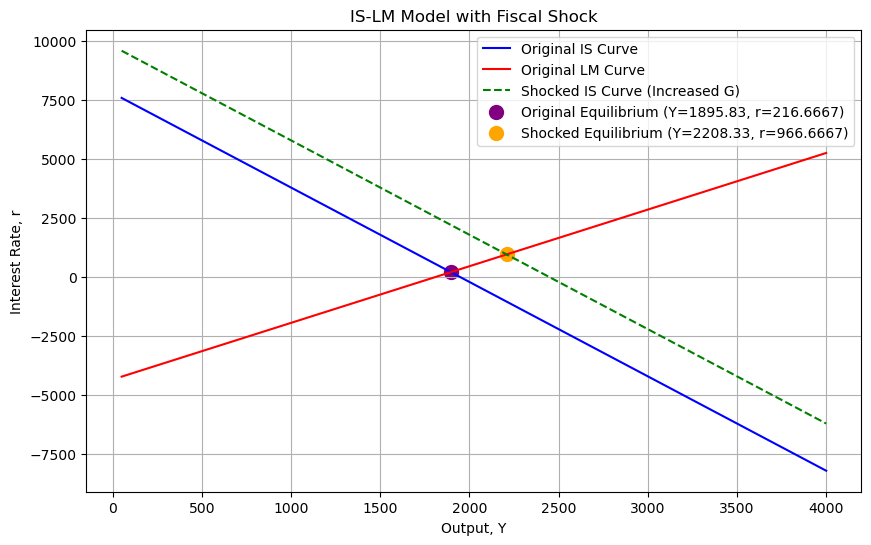

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from ISLM_anna import ISLMclass

# Initialize the model with original parameters
original_model = ISLMclass(
    a=100, b=0.8, c=150, d=0.05, e=1.2, f=0.5, g=2,
    T=200, G=300, M=6500, P=3, r=0.04, N=500
)

# Initialize the model with a fiscal shock (increase in G)
shocked_model = ISLMclass(
    a=100, b=0.8, c=150, d=0.05, e=1.2, f=0.5, g=2,
    T=200, G=400, M=6500, P=3, r=0.04, N=500
)

# Define function to compute IS and LM rates
def compute_rates(model, Y):
    IS_r = (1 / model.par.d) * (model.par.a + model.par.c - model.par.b * model.par.T + model.par.G - (1 - model.par.b) * Y)
    LM_r = (model.par.e / model.par.f) * Y - (1 / model.par.f) * (model.par.M / model.par.P)
    return IS_r, LM_r

# Generate Y values
Y_values = np.linspace(50, 4000, 400)

# Compute rates for original and shocked models
original_IS_r_values, original_LM_r_values = zip(*(compute_rates(original_model, Y) for Y in Y_values))
shocked_IS_r_values, _ = zip(*(compute_rates(shocked_model, Y) for Y in Y_values))

# Find equilibrium for the original model
Y_eq_original = fsolve(lambda Y: abs(compute_rates(original_model, Y)[0] - compute_rates(original_model, Y)[1]), 500)[0]
r_eq_original = compute_rates(original_model, Y_eq_original)[1]

# Find equilibrium for the shocked model
Y_eq_shocked = fsolve(lambda Y: abs(compute_rates(shocked_model, Y)[0] - compute_rates(shocked_model, Y)[1]), 500)[0]
r_eq_shocked = compute_rates(shocked_model, Y_eq_shocked)[1]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(Y_values, original_IS_r_values, label='Original IS Curve', color='blue')
plt.plot(Y_values, original_LM_r_values, label='Original LM Curve', color='red')
plt.plot(Y_values, shocked_IS_r_values, label='Shocked IS Curve (Increased G)', color='green', linestyle='--')
plt.scatter(Y_eq_original, r_eq_original, color='purple', s=100, label=f'Original Equilibrium (Y={Y_eq_original:.2f}, r={r_eq_original:.4f})')
plt.scatter(Y_eq_shocked, r_eq_shocked, color='orange', s=100, label=f'Shocked Equilibrium (Y={Y_eq_shocked:.2f}, r={r_eq_shocked:.4f})')
plt.title('IS-LM Model with Fiscal Shock')
plt.xlabel('Output, Y')
plt.ylabel('Interest Rate, r')
plt.legend()
plt.grid(True)
plt.show()


# Model description

**Write out the model in equations here.** 

Make sure you explain well the purpose of the model and comment so that other students who may not have seen it before can follow.  

## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 